# Business Problem: 
***Get insights from the dataset of No-Churn Telecom, to find out why the more Customers are leaving the company than expected and what can be done to improve the current situation***

# Objective: 
- In this notebook we explore the Raw Data collected from No-Churn_Telecom_Europe_renamed.xlsx and  try perform **Exploratory Data Analysis**.

**Exploratory Data Analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods..**

### Why we need this?
- EDA hepls us to get insight of a data set,Understand the underlying structure and extract important parameters and relationships that hold between them.
- It's the EDA, that helps us to understand the underlying causes of declining Performance Ratins Index of Employees of  INX Future Inc  and what's the course correction to resolve the isssue.

**Steps in Exploratory Data Analysis**

Step 1 : Import the libraries

Step 2 : Import the data-set

Step 3 : Descriptive Statistics

Step 4 : Analyse the Target Variable

Step 5 : Analysis of categorical features

Step 6 : Analysis of numerical features

Step 7 : Recommendations 

# Step 1 : Import the libraries

In [1]:
# Import the libraries
import numpy as np  #NumPy is the fundamental package for scientific computing with Python.
import pandas as pd #andas is for data manipulation and analysis. 
import matplotlib.pyplot as plt #Matplotlib is a Python 2D plotting library which produces publication quality figures.
import seaborn as sns #Seaborn is a Python data visualization library based on matplotlib
%matplotlib inline

#!pip install plotly
# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
#import plotly.tools as tls

# Step 2 : Import the data-set

In [2]:
#pd.set_option('display.height', 500)
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
df = pd.read_excel('No-Churn_Telecom_Europe_renamed.xlsx')
print(df.shape)
df.head()

(4617, 21)


State  Account_Length  Area_Code      Phone International_Plan VMail_Plan  \
0    KS             128        415   382-4657                 no        yes   
1    OH             107        415   371-7191                 no        yes   
2    NJ             137        415   358-1921                 no         no   
3    OH              84        408   375-9999                yes         no   
4    OK              75        415   330-6626                yes         no   

   VMail_Message  Day_Mins  Day_Calls  Day_Charge  Eve_Mins  Eve_Calls  \
0             25     265.1        110       45.07     197.4         99   
1             26     161.6        123       27.47     195.5        103   
2              0     243.4        114       41.38     121.2        110   
3              0     299.4         71       50.90      61.9         88   
4              0     166.7        113       28.34     148.3        122   

   Eve_Charge  Night_Mins  Night_Calls  Night_Charge  International_Mins  \
0       16.78       244.7           91         11.01                10.0   
1       16.62       254.4          103         11.45                13.7   
2       10.30       162.6          104          7.32                12.2   
3        5.26       196.9           89          8.86                 6.6   
4       12.61       186.9          121          8.41                10.1   

   International_calls  International_Charge  CustServ_Calls    churn  
0                    3                  2.70               1   False.  
1                    3                  3.70               1   False.  
2                    5                  3.29               0   False.  
3                    7                  1.78               2   False.  
4                    3                  2.73               3   False.

# Step 3 : Descriptive Statistics

In [3]:
# Check the type of our features. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
State                   4617 non-null object
Account_Length          4617 non-null int64
Area_Code               4617 non-null int64
Phone                   4617 non-null object
International_Plan      4617 non-null object
VMail_Plan              4617 non-null object
VMail_Message           4617 non-null int64
Day_Mins                4617 non-null float64
Day_Calls               4617 non-null int64
Day_Charge              4617 non-null float64
Eve_Mins                4617 non-null float64
Eve_Calls               4617 non-null int64
Eve_Charge              4617 non-null float64
Night_Mins              4617 non-null float64
Night_Calls             4617 non-null int64
Night_Charge            4617 non-null float64
International_Mins      4617 non-null float64
International_calls     4617 non-null int64
International_Charge    4617 non-null float64
CustServ_Calls          4617 non-null

In [4]:
# Display the statistical overview of the customers
df.describe()

Account_Length    Area_Code  VMail_Message     Day_Mins    Day_Calls  \
count     4617.000000  4617.000000    4617.000000  4617.000000  4617.000000   
mean       100.645224   437.046350       7.849903   180.447152   100.054364   
std         39.597194    42.288212      13.592333    53.983540    19.883027   
min          1.000000   408.000000       0.000000     0.000000     0.000000   
25%         74.000000   408.000000       0.000000   143.700000    87.000000   
50%        100.000000   415.000000       0.000000   180.000000   100.000000   
75%        127.000000   510.000000      17.000000   216.800000   113.000000   
max        243.000000   510.000000      51.000000   351.500000   165.000000   

        Day_Charge     Eve_Mins    Eve_Calls   Eve_Charge   Night_Mins  \
count  4617.000000  4617.000000  4617.000000  4617.000000  4617.000000   
mean     30.676576   200.429088   100.179770    17.036703   200.623933   
std       9.177145    50.557001    19.821314     4.297332    50.543616   
min       0.000000     0.000000     0.000000     0.000000    23.200000   
25%      24.430000   165.900000    87.000000    14.100000   167.100000   
50%      30.600000   200.800000   101.000000    17.070000   200.800000   
75%      36.860000   234.000000   114.000000    19.890000   234.900000   
max      59.760000   363.700000   170.000000    30.910000   395.000000   

       Night_Calls  Night_Charge  International_Mins  International_calls  \
count  4617.000000   4617.000000         4617.000000          4617.000000   
mean     99.944120      9.028185           10.279294             4.433831   
std      19.935053      2.274488            2.757361             2.457615   
min      12.000000      1.040000            0.000000             0.000000   
25%      87.000000      7.520000            8.600000             3.000000   
50%     100.000000      9.040000           10.300000             4.000000   
75%     113.000000     10.570000           12.100000             6.000000   
max     175.000000     17.770000           20.000000            20.000000   

       International_Charge  CustServ_Calls  
count           4617.000000     4617.000000  
mean               2.775926        1.567035  
std                0.744413        1.307019  
min                0.000000        0.000000  
25%                2.320000        1.000000  
50%                2.780000        1.000000  
75%                3.270000        2.000000  
max                5.400000        9.000000

In [5]:
df = df.drop(['Phone'],axis=1)

In [6]:
obj_df = df.select_dtypes(include=['object']).copy()
print(obj_df.shape)
obj_df.head()

(4617, 4)


State International_Plan VMail_Plan    churn
0    KS                 no        yes   False.
1    OH                 no        yes   False.
2    NJ                 no         no   False.
3    OH                yes         no   False.
4    OK                yes         no   False.

In [7]:
num_df = df.select_dtypes(exclude=['object']).copy()
print(num_df.shape)
num_df.head()

(4617, 16)


Account_Length  Area_Code  VMail_Message  Day_Mins  Day_Calls  Day_Charge  \
0             128        415             25     265.1        110       45.07   
1             107        415             26     161.6        123       27.47   
2             137        415              0     243.4        114       41.38   
3              84        408              0     299.4         71       50.90   
4              75        415              0     166.7        113       28.34   

   Eve_Mins  Eve_Calls  Eve_Charge  Night_Mins  Night_Calls  Night_Charge  \
0     197.4         99       16.78       244.7           91         11.01   
1     195.5        103       16.62       254.4          103         11.45   
2     121.2        110       10.30       162.6          104          7.32   
3      61.9         88        5.26       196.9           89          8.86   
4     148.3        122       12.61       186.9          121          8.41   

   International_Mins  International_calls  International_Charge  \
0                10.0                    3                  2.70   
1                13.7                    3                  3.70   
2                12.2                    5                  3.29   
3                 6.6                    7                  1.78   
4                10.1                    3                  2.73   

   CustServ_Calls  
0               1  
1               1  
2               0  
3               2  
4               3

In [8]:
from scipy import stats
def Data_table(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values
    return summary

In [9]:
Data_table(obj_df)

Dataset Shape: (4617, 4)


Name  dtypes  Missing  Uniques First Value Second Value  \
0               State  object        0       51          KS           OH   
1  International_Plan  object        0        2          no           no   
2          VMail_Plan  object        0        2         yes          yes   
3               churn  object        0        2      False.       False.   

  Third Value  
0          NJ  
1          no  
2          no  
3      False.

In [10]:
Data_table(num_df)

Dataset Shape: (4617, 16)


Name   dtypes  Missing  Uniques  First Value  \
0         Account_Length    int64        0      218       128.00   
1              Area_Code    int64        0        3       415.00   
2          VMail_Message    int64        0       47        25.00   
3               Day_Mins  float64        0     1901       265.10   
4              Day_Calls    int64        0      123       110.00   
5             Day_Charge  float64        0     1901        45.07   
6               Eve_Mins  float64        0     1833       197.40   
7              Eve_Calls    int64        0      125        99.00   
8             Eve_Charge  float64        0     1621        16.78   
9             Night_Mins  float64        0     1813       244.70   
10           Night_Calls    int64        0      130        91.00   
11          Night_Charge  float64        0     1012        11.01   
12    International_Mins  float64        0      168        10.00   
13   International_calls    int64        0       21         3.00   
14  International_Charge  float64        0      168         2.70   
15        CustServ_Calls    int64        0       10         1.00   

    Second Value  Third Value  
0         107.00       137.00  
1         415.00       415.00  
2          26.00         0.00  
3         161.60       243.40  
4         123.00       114.00  
5          27.47        41.38  
6         195.50       121.20  
7         103.00       110.00  
8          16.62        10.30  
9         254.40       162.60  
10        103.00       104.00  
11         11.45         7.32  
12         13.70        12.20  
13          3.00         5.00  
14          3.70         3.29  
15          1.00         0.00

In [11]:
df.Area_Code.unique()

array([415, 408, 510], dtype=int64)

## **key Observations:**
- The dataset contains 21 columns and 4617 observations
- There is about 86% of customers stayed and 4% of customers left.
- We observe that although Area_Code is in numeric value but it is a categorical feature.
- Phone, feature is like customers ID and it doesn't have any predictive relevance
- There are 6 columns that have numeric value and 16 have non-numeric

# Step 4 : Analyse the Target Variable

In [12]:
# NOTE: When performing cross validation, its important to maintain this turnover ratio
churn_rate = df.churn.value_counts() / len(df)
churn_rate

 False.    0.857916
 True.     0.142084
Name: churn, dtype: float64

In [13]:
df.churn.value_counts()

 False.    3961
 True.      656
Name: churn, dtype: int64

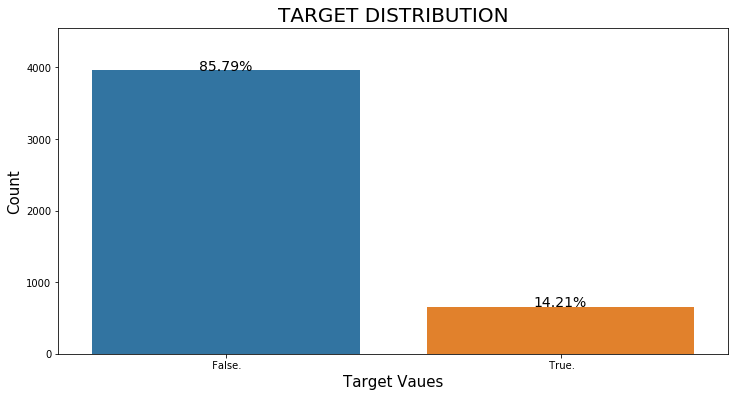

In [14]:
total = len(df)
plt.figure(figsize=(12,6))

g = sns.countplot(x='churn', data=df)
g.set_title("TARGET DISTRIBUTION", fontsize = 20)
g.set_xlabel("Target Vaues", fontsize = 15)
g.set_ylabel("Count", fontsize = 15)
sizes=[] # Get highest values in y
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 
g.set_ylim(0, max(sizes) * 1.15) # set y limit based on highest heights

plt.show()

In [15]:
# Overview summary of (Churn :---> False/True)
churn_Summary = df.groupby('churn')
churn_Summary.mean()

Account_Length   Area_Code  VMail_Message    Day_Mins   Day_Calls  \
churn                                                                        
 False.      100.354456  436.839939       8.385761  176.000252   99.922747   
 True.       102.400915  438.292683       4.614329  207.298018  100.849085   

         Day_Charge    Eve_Mins  Eve_Calls  Eve_Charge  Night_Mins  \
churn                                                                
 False.   29.920624  198.638425  100.16410   16.884509  199.734158   
 True.    35.241098  211.241311  100.27439   17.955671  205.996494   

         Night_Calls  Night_Charge  International_Mins  International_calls  \
churn                                                                         
 False.    99.998233      8.988147           10.206665             4.479677   
 True.     99.617378      9.269939           10.717835             4.157012   

         International_Charge  CustServ_Calls  
churn                                          
 False.              2.756319        1.455693  
 True.               2.894314        2.239329

In [16]:
print('---Mean CustServ_Calls---', churn_Summary.mean()['CustServ_Calls'])
print('\n')
print('---Mean International_calls---', churn_Summary.mean()['International_calls'])
print('\n')
print('---Mean VMail_Message---', churn_Summary.mean()['VMail_Message'])
print('\n')
print('---Mean Day_Mins---', churn_Summary.mean()['Day_Mins'])

---Mean CustServ_Calls--- churn
 False.    1.455693
 True.     2.239329
Name: CustServ_Calls, dtype: float64


---Mean International_calls--- churn
 False.    4.479677
 True.     4.157012
Name: International_calls, dtype: float64


---Mean VMail_Message--- churn
 False.    8.385761
 True.     4.614329
Name: VMail_Message, dtype: float64


---Mean Day_Mins--- churn
 False.    176.000252
 True.     207.298018
Name: Day_Mins, dtype: float64


## **key Observations:**
- The dataset is imbalanced,Since there is about 86% of customers stayed and 14% of customers left.
- Some of the Features have very similar Mean value for True and False Churn,but other features like CustServ_Calls, VMail_Message, Day_Mins have considerable difference for True and False Churn

# Step 5 : Analysis of categorical features

In [17]:
df["Area_Code"] = df["Area_Code"].replace({415:"415",408:"408",510:"510"})

In [18]:
obj_df = df.select_dtypes(include=['object']).copy()
print(obj_df.shape)
obj_df.head()

(4617, 5)


State Area_Code International_Plan VMail_Plan    churn
0    KS       415                 no        yes   False.
1    OH       415                 no        yes   False.
2    NJ       415                 no         no   False.
3    OH       408                yes         no   False.
4    OK       415                yes         no   False.

In [19]:
churn = df[df['churn']==' True.']
not_churn = df[df['churn']==' False.']

In [20]:
#function  for pie plot for customer attrition types
def plot_pie(column) :
    
    trace1 = go.Pie(values  = churn[column].value_counts().values.tolist(),
                    labels  = churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Churn Customers",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    trace2 = go.Pie(values  = not_churn[column].value_counts().values.tolist(),
                    labels  = not_churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "Non churn customers" 
                   )


    layout = go.Layout(dict(title = column + " distribution in customer churn",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "Non churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)

In [21]:
obj_df.head(1)

State Area_Code International_Plan VMail_Plan    churn
0    KS       415                 no        yes   False.

In [22]:
obj_df =obj_df.iloc[:,:-1]

In [23]:

#for all categorical columns plot pie
for i in obj_df :
    plot_pie(i)

## **key Observations:**
- State and Area_code doesn't seems to have any impact on customers churn.
- Percentage of Non-Churn Customers having International_Plan is only 6.56%, whereas Percentage of Churn Customers having International_Plan is 28.4%. **Hence, clearly custmoers are not happy with Company's International_Plan Strategies or policies**
- Percentage of Non-Churn Customers having VMail_Plan is only 28.8%, whereas Percentage of Churn Customers having VMail_Plan is 14.8%. **We can infer that customers who haven't subscribe to VMail_Plan are more prone churn.**

# Step 6 : Analysis of numerical features

In [24]:
num_df = df.select_dtypes(exclude=['object']).copy()
print(num_df.shape)
num_df.head()

(4617, 15)


Account_Length  VMail_Message  Day_Mins  Day_Calls  Day_Charge  Eve_Mins  \
0             128             25     265.1        110       45.07     197.4   
1             107             26     161.6        123       27.47     195.5   
2             137              0     243.4        114       41.38     121.2   
3              84              0     299.4         71       50.90      61.9   
4              75              0     166.7        113       28.34     148.3   

   Eve_Calls  Eve_Charge  Night_Mins  Night_Calls  Night_Charge  \
0         99       16.78       244.7           91         11.01   
1        103       16.62       254.4          103         11.45   
2        110       10.30       162.6          104          7.32   
3         88        5.26       196.9           89          8.86   
4        122       12.61       186.9          121          8.41   

   International_Mins  International_calls  International_Charge  \
0                10.0                    3                  2.70   
1                13.7                    3                  3.70   
2                12.2                    5                  3.29   
3                 6.6                    7                  1.78   
4                10.1                    3                  2.73   

   CustServ_Calls  
0               1  
1               1  
2               0  
3               2  
4               3

In [25]:
#function  for histogram for customer attrition types
def histogram(column) :
    trace1 = go.Histogram(x  = churn[column],
                           marker_color='#FF0000',
                          histnorm= "percent",
                          name = "Churn Customers",
                          marker = dict(line = dict(width = .5,
                                                    color = "Red"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
    trace2 = go.Histogram(x  = not_churn[column],
                          marker_color='#00ff00',
                          histnorm = "percent",
                          name = "Non churn customers",
                          marker = dict(line = dict(width = .5,
                                              color = "green"
                                             )
                                 ),
                          opacity = .9
                         )
    
    data = [trace1,trace2]
    layout = go.Layout(dict(title =column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)

In [26]:
#for all numerical columns plot histogram    
for i in num_df :
    histogram(i)

## **key Observations:**
- 'Account_Length','Day_Calls','Night_Calls' doesn't seems to have clear distinction between  churn customers & Non-Churn Customers.
- Customers having more than 40 Day_Charge , more prone to churn.Similar trend is seen in Day_Mins,Customers having high Day_Mins (more than 220)more prone to churn.
- Eve_Charge,Night_Charge and Eve_Mins, Night_Mins follows the above trend.It may implies thats  Customers who have high usage of voice call have preception negattive impression about how they charged fot thr services comapred other market players
- As we have seen earlier customers who don't have 'VMail_Plan' are more prone to churn. It can seens in case of 'VMail_Message'
- Customers having more than 3 CustServ_Calls, are more likely to churn. It may possible that call center representative may not able to solve their issues.
- Customers who make less than 3 International_calls are more prone to churn.

# Let's obeserve single Features with respect to Target

In [27]:
obj_df = df.select_dtypes(include=['object']).copy()
print(obj_df.shape)
obj_df.head()

(4617, 5)


State Area_Code International_Plan VMail_Plan    churn
0    KS       415                 no        yes   False.
1    OH       415                 no        yes   False.
2    NJ       415                 no         no   False.
3    OH       408                yes         no   False.
4    OK       415                yes         no   False.

In [28]:
df['churn'] = df.churn.replace({' True.': 1, ' False.': 0})

In [29]:
df.churn.unique()

array([0, 1], dtype=int64)

In [30]:
import plotly.figure_factory as ff
from plotly.offline import iplot, init_notebook_mode

In [31]:
def plot_distribution(df, var_select=None, bins=1.0): 
    # Calculate the correlation coefficient between the new variable and the target
    tmp_churn = df[df['churn'] == 1]
    tmp_no_churn = df[df['churn'] == 0]    
    corr = df['churn'].corr(df[var_select])
    corr = np.round(corr,3)
    tmp1 = tmp_churn[var_select].dropna()
    tmp2 = tmp_no_churn[var_select].dropna()
    hist_data = [tmp1, tmp2]
    
    group_labels = ['Yes_churn', 'No_churn']
    colors = ['#FF0000','#00ff00', ]

    fig = ff.create_distplot(hist_data,
                             group_labels,
                             colors = colors, 
                             show_hist = True,
                             curve_type='kde', 
                             bin_size = bins
                            )
    
    fig['layout'].update(title = var_select+' '+'(corr target ='+ str(corr)+')')

    iplot(fig, filename = 'Density plot')

In [32]:
print(f"The mininum value in International_Charge is {df['International_Charge'].min()} and the maximum is {df['International_Charge'].max()}")
print(f"The mean International_Charge of Churn Customers is {round(df[df['churn'] != 0]['International_Charge'].mean(),2)}\
      \nThe mean International_Charge of Non-churn Customers is {round(df[df['churn'] == 0]['International_Charge'].mean(),2)}")

plot_distribution(df, 'International_Charge', bins=4.0)

The mininum value in International_Charge is 0.0 and the maximum is 5.4
The mean International_Charge of Churn Customers is 2.89      
The mean International_Charge of Non-churn Customers is 2.76


In [33]:
print(f"The mininum value in International_calls is {df['International_calls'].min()} and the maximum is {df['International_calls'].max()}")
print(f"The mean International_calls of Churn Customers is {round(df[df['churn'] != 0]['International_calls'].mean(),2)}\
      \nThe mean International_calls of Non-churn Customers is {round(df[df['churn'] == 0]['International_calls'].mean(),2)}")

plot_distribution(df, 'International_calls', bins=4.0)

The mininum value in International_calls is 0 and the maximum is 20
The mean International_calls of Churn Customers is 4.16      
The mean International_calls of Non-churn Customers is 4.48


In [34]:
print(f"The mininum value in International_calls is {df['International_Mins'].min()} and the maximum is {df['International_Mins'].max()}")
print(f"The mean International_calls of Churn Customers is {round(df[df['churn'] != 0]['International_Mins'].mean(),2)}\
      \nThe mean International_calls of Non-churn Customers is {round(df[df['churn'] == 0]['International_Mins'].mean(),2)}")

plot_distribution(df, 'International_Mins', bins=4.0)

The mininum value in International_calls is 0.0 and the maximum is 20.0
The mean International_calls of Churn Customers is 10.72      
The mean International_calls of Non-churn Customers is 10.21


## **key Observations:**
- Clealy customers who have more 'International_Charge' & 'International_Mins' have more tendency to churn.
- And customers who have less 'International_calls' have more tendency to churn.It may possible that customers who making long calls are the one who have less numbers of 'International_calls'

In [35]:
print(f"The mininum value in VMail_Message is {df['VMail_Message'].min()} and the maximum is {df['VMail_Message'].max()}")
print(f"The mean VMail_Message of Churn Customers is {round(df[df['churn'] != 0]['VMail_Message'].mean(),2)}\
      \nThe mean VMail_Message of Non-churn Customers is {round(df[df['churn'] == 0]['VMail_Message'].mean(),2)}")

plot_distribution(df, 'VMail_Message', bins=4.0)

The mininum value in VMail_Message is 0 and the maximum is 51
The mean VMail_Message of Churn Customers is 4.61      
The mean VMail_Message of Non-churn Customers is 8.39


## **key Observations:**
- It customers who haven't subscribe to 'VMail_Plan' have Zero 'VMail_Message' and are more vulnerable to churn

In [36]:
#df['TotalCharges'].fillna(df_train['MonthlyCharges'], inplace=True)
print(f"The mininum value in Day_Charge is {df['Day_Charge'].min()} and the maximum is {df['Day_Charge'].max()}")
print(f"The mean Day_Charge of Churn Customers is {round(df[df['churn'] != 0]['Day_Charge'].mean(),2)}\
      \nThe mean Day_Charge of Non-churn Customers is {round(df[df['churn'] == 0]['Day_Charge'].mean(),2)}")

plot_distribution(df, 'Day_Charge', bins=4.0)

The mininum value in Day_Charge is 0.0 and the maximum is 59.76
The mean Day_Charge of Churn Customers is 35.24      
The mean Day_Charge of Non-churn Customers is 29.92


In [37]:
print(f"The mininum value in Day_Mins is {df['Day_Mins'].min()} and the maximum is {df['Day_Mins'].max()}")
print(f"The mean value in Day_Mins is {df['Day_Mins'].mean()}")
print(f"The mean Day_Mins of Churn Customers is {round(df[df['churn'] != 0]['Day_Mins'].mean(),2)}\
      \nThe mean Day_Mins of Non-churn Customers is {round(df[df['churn'] == 0]['Day_Mins'].mean(),2)}")

plot_distribution(df, 'Day_Mins', bins=4.0)

The mininum value in Day_Mins is 0.0 and the maximum is 351.5
The mean value in Day_Mins is 180.44715183019264
The mean Day_Mins of Churn Customers is 207.3      
The mean Day_Mins of Non-churn Customers is 176.0


## **key Observations:**
- There is single modal graph for No-churn and Bi-modal graph for churn Customers
- Customers who have 'Day_Mins' in the range of 120-170 and more than 220, are company's charging plan coslier, Hence more likely to churn

In [38]:
df.columns

Index(['State', 'Account_Length', 'Area_Code', 'International_Plan',
       'VMail_Plan', 'VMail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge',
       'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls',
       'Night_Charge', 'International_Mins', 'International_calls',
       'International_Charge', 'CustServ_Calls', 'churn'],
      dtype='object')

In [39]:
print(f"The mininum value in CustServ_Calls is {df['CustServ_Calls'].min()} and the maximum is {df['CustServ_Calls'].max()}")
print(f"The mean value in CustServ_Calls is {df['CustServ_Calls'].mean()}")
print(f"The mean CustServ_Calls of Churn Customers is {round(df[df['churn'] != 0]['CustServ_Calls'].mean(),2)}\
      \nThe mean v of Non-churn Customers is {round(df[df['churn'] == 0]['CustServ_Calls'].mean(),2)}")

plot_distribution(df, 'CustServ_Calls', bins=4.0)

The mininum value in CustServ_Calls is 0 and the maximum is 9
The mean value in CustServ_Calls is 1.5670348711284383
The mean CustServ_Calls of Churn Customers is 2.24      
The mean v of Non-churn Customers is 1.46


## **key Observations:**
- Customers having more than 3 CustServ_Calls, are more likely to churn. It may possible that Company's call center representative may not able to solve their issues and they are leaving the company.

# Step 7 : Recommendations 

Due to new players in the market, telecom industry has become very competitive and retaining customers becoming a challenge.But After analysing the variables that are influencing the customers
to migrate. it made easy if following recommendations are taken care off:

 -  Since customers seem to be not happy with Company's **International_Plan Strategies or policies**, it needs** required amendments according to the current market competitors' International_Plan Strategies or policies.**
 
 - Customers who haven't subscribe to VMail_Plan are more prone churn, hence it would in great interest of No-Churn Telecom to **give more incentives as per the advice of experts, to customers so they subscribe to VMail_Plan.**
 
 -  Customers who have a high usage of voice calls have a negative impression about how they charged for the services compared to how other market players in Europe are charging their customers for the same services. Clearly, it would be not wrong to say that **No-Churn Telecom needs to do a comprehensive survey of its competitors services and do changes accordingly.**
 
 - Customers who are making more than 3 CustServ_Calls, are more likely to churn. It is possible that the call center representatives of No-Churn Telecom are not able to solve their issues. It's whether due to lack of motivation or required knowledge and any other resources they are lacking etc.
 **Performance and potential of Call center representative of No-Churn Telecom needs to looked into, to make required course correction.**